tensor(3410097.0951)
tensor([[[-0.0054],
         [-0.0085],
         [-0.0087],
         ...,
         [-0.0087],
         [-0.0065],
         [-0.0085]],

        [[-0.0079],
         [-0.0087],
         [-0.0081],
         ...,
         [-0.0078],
         [-0.0080],
         [-0.0086]],

        [[-0.0085],
         [-0.0080],
         [-0.0085],
         ...,
         [-0.0076],
         [-0.0069],
         [-0.0085]],

        ...,

        [[-0.0086],
         [-0.0076],
         [-0.0081],
         ...,
         [-0.0087],
         [-0.0071],
         [-0.0076]],

        [[-0.0083],
         [-0.0086],
         [ 0.0235],
         ...,
         [-0.0072],
         [-0.0078],
         [-0.0079]],

        [[-0.0081],
         [-0.0056],
         [-0.0087],
         ...,
         [-0.0082],
         [-0.0087],
         [ 0.0101]]])
tensor(1.0000)
tensor(-1.3872e-19)
spectral radius
[3.24371385e+00 3.24371385e+00 3.35765743e+00 ... 2.46994786e-02
 7.00055177e-04 2.90896901e-02]
a

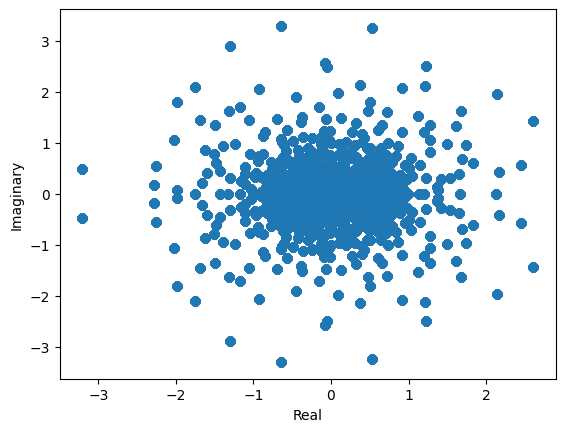

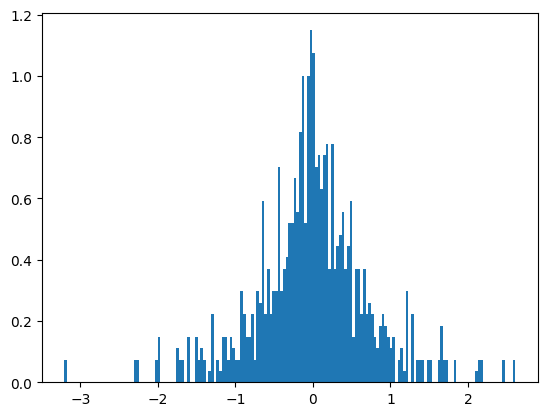

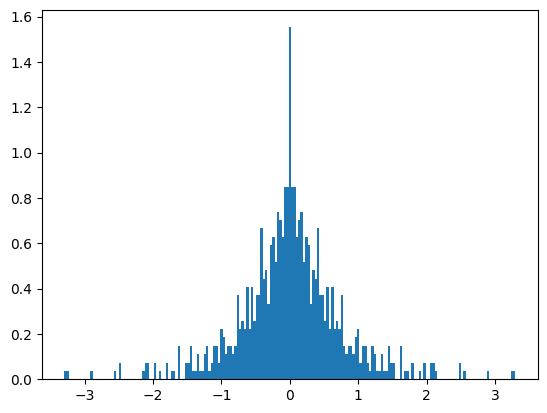

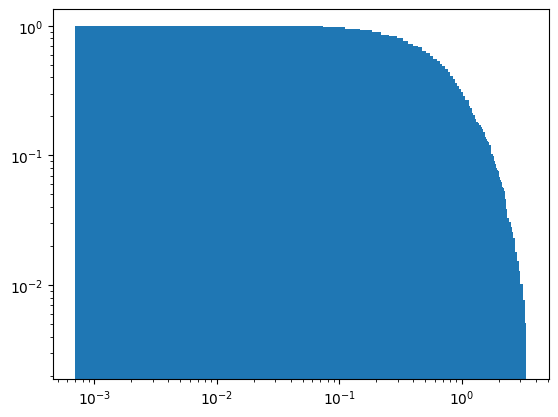

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pareto 
from torch.distributions.pareto import Pareto
import torch
b=2
input_size=784
torch.set_default_dtype(torch.float64)
m = Pareto(torch.tensor([1.0]), torch.tensor([1.0]))
res=m.sample(torch.Size([input_size,input_size]))
print(res.var())
temp=res/np.sqrt(res.var())
processed=temp-temp.mean()
print(processed)
print(processed.var())
print(processed.mean())
#print(res)
def spectral_radius(input_matrix):
    result=[]

    s,v=torch.linalg.eig(input_matrix)
    #print(s)
    abs=torch.abs(s)
    spectral=torch.max(abs).item()
    return spectral
def spectral_distribution(input_matrix):
    result=[]

    s,v=torch.linalg.eig(input_matrix)
    #abs=torch.abs(s)
    #print(s)
    return s

#print(res[:,:,0].size())

spectral_radius(processed[:,:,0])
print("spectral radius")
distribution=np.asarray([])
for i in range(100):
    s=spectral_distribution(processed[:,:,0])
    distribution=np.append(distribution,s)

print(np.abs(distribution))
print("average")
print(torch.mean(s))
print(torch.var(s))
x = [ele.real for ele in distribution]
# extract imaginary part
y = [ele.imag for ele in distribution]
  
# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
#plt.xlim(-200,200)
#plt.ylim(-200,200)
plt.show()

plt.hist(x, density=True, bins='auto', histtype='stepfilled')
#plt.xlim(-200,200)
plt.show()
plt.hist(y, density=True, bins='auto', histtype='stepfilled')
plt.show()
#plt.xscale("log")
plt.hist(np.abs(distribution), density=True, bins='auto', histtype='stepfilled',cumulative=-1)
plt.yscale("log")
plt.xscale("log")
plt.show()






In [ ]:
use empirical variance to normalise it 